In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
# Cargar el dataset de Fashion MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalización de los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionar los datos para que se ajusten a la entrada de la CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [3]:
model_1 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
model_2 = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
history_1 = model_1.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
history_2 = model_2.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8063 - loss: 0.5594 - val_accuracy: 0.8842 - val_loss: 0.3136
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8955 - loss: 0.2861 - val_accuracy: 0.8990 - val_loss: 0.2710
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9146 - loss: 0.2343 - val_accuracy: 0.9063 - val_loss: 0.2557
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9267 - loss: 0.2007 - val_accuracy: 0.9053 - val_loss: 0.2527
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9392 - loss: 0.1663 - val_accuracy: 0.9080 - val_loss: 0.2528
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9465 - loss: 0.1458 - val_accuracy: 0.9108 - val_loss: 0.2511
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9530 - loss: 0.1213 - val_accuracy: 0.9112 - val_loss: 0.2633
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9612 - l

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9068 - loss: 0.3370
Modelo 1 - Test accuracy: 0.9096999764442444
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8739 - loss: 0.4011
Modelo 2 - Test accuracy: 0.8708000183105469


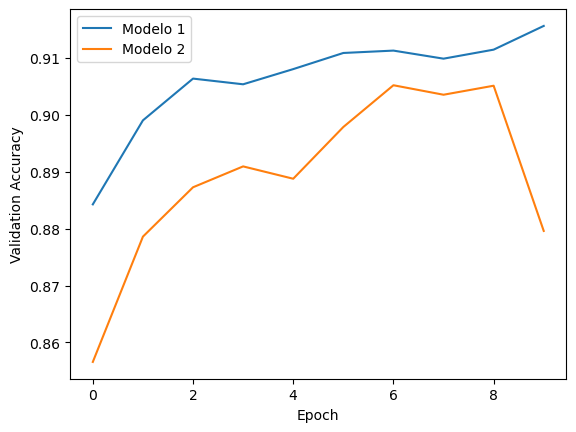

In [6]:
# Evaluación del Modelo 1
test_loss_1, test_acc_1 = model_1.evaluate(X_test, y_test)
print(f'Modelo 1 - Test accuracy: {test_acc_1}')

# Evaluación del Modelo 2
test_loss_2, test_acc_2 = model_2.evaluate(X_test, y_test)
print(f'Modelo 2 - Test accuracy: {test_acc_2}')

# Comparación de resultados
plt.plot(history_1.history['val_accuracy'], label='Modelo 1')
plt.plot(history_2.history['val_accuracy'], label='Modelo 2')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

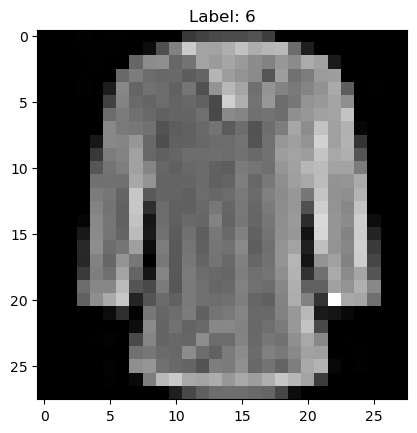

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


ValueError: The layer sequential_1 has never been called and thus has no defined input.

In [13]:
# Seleccionar una imagen de prueba
image_index = 4  # Cambia el índice para seleccionar diferentes imágenes
test_image = X_test[image_index].reshape(1, 28, 28, 1)

# Mostrar la imagen de prueba
plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_test[image_index]}")
plt.show()

# Pasar una muestra a través del modelo para definir las capas
model_2.predict(test_image)

# Crear un modelo que devuelva las salidas de las capas intermedias
layer_outputs = [layer.output for layer in model_2.layers]
activation_model = Model(inputs=model_2.input, outputs=layer_outputs)

# Obtener las activaciones
activations = activation_model.predict(test_image)

# Función para visualizar los mapas de activación
def display_activation(activations, col_size, row_size, layer_number): 
    activation = activations[layer_number]
    activation_index = 0
    fig, ax = plt.subplots(row_size, col_size, figsize=(15, 15))
    for row in range(0, row_size):
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1

# Visualizar los mapas de activación de la primera capa convolucional
layer_number = 3  # Índice de la capa que deseas visualizar (puedes cambiarlo)
display_activation(activations, 6, 6, layer_number)